# Лабораторна робота 1.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

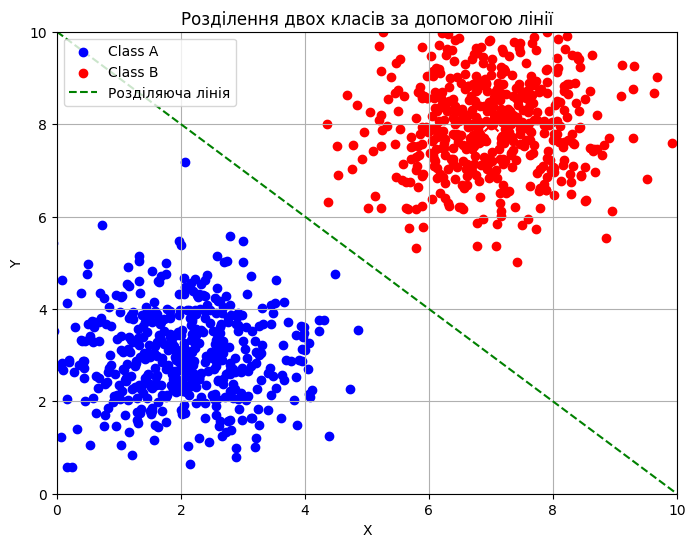

In [2]:
import numpy as np
import matplotlib.pyplot as plt

C_A = (2, 3) 
C_B = (7, 8)  
sigma = 1  

N_A = 500
N_B = 500

points_A = np.random.normal(loc=C_A, scale=sigma, size=(N_A, 2))
points_B = np.random.normal(loc=C_B, scale=sigma, size=(N_B, 2))

x_mid = (C_A[0] + C_B[0]) / 2
y_mid = (C_A[1] + C_B[1]) / 2
slope = (C_B[1] - C_A[1]) / (C_B[0] - C_A[0])
perpendicular_slope = -1 / slope

x_vals = np.array([0, 10])
y_vals = perpendicular_slope * (x_vals - x_mid) + y_mid

plt.figure(figsize=(8, 6))
plt.scatter(points_A[:, 0], points_A[:, 1], color='blue', label='Class A')
plt.scatter(points_B[:, 0], points_B[:, 1], color='red', label='Class B')
plt.scatter(*C_A, color='blue', marker='x', s=100) 
plt.scatter(*C_B, color='red', marker='x', s=100)   
plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Розділяюча лінія')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Розділення двох класів за допомогою лінії")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)
plt.show()


In [3]:
import pandas as pd

labels_A = np.full(N_A, 'A') 
labels_B = np.full(N_B, 'B')  

data_A = np.column_stack((points_A, labels_A))
data_B = np.column_stack((points_B, labels_B))

data = np.vstack((data_A, data_B))

df = pd.DataFrame(data, columns=['x', 'y', 'class'])

df.to_csv('linear_separable_data.csv', index=False)
print("Дані збережено в файл 'linear_separable_data.csv'")

Дані збережено в файл 'linear_separable_data.csv'


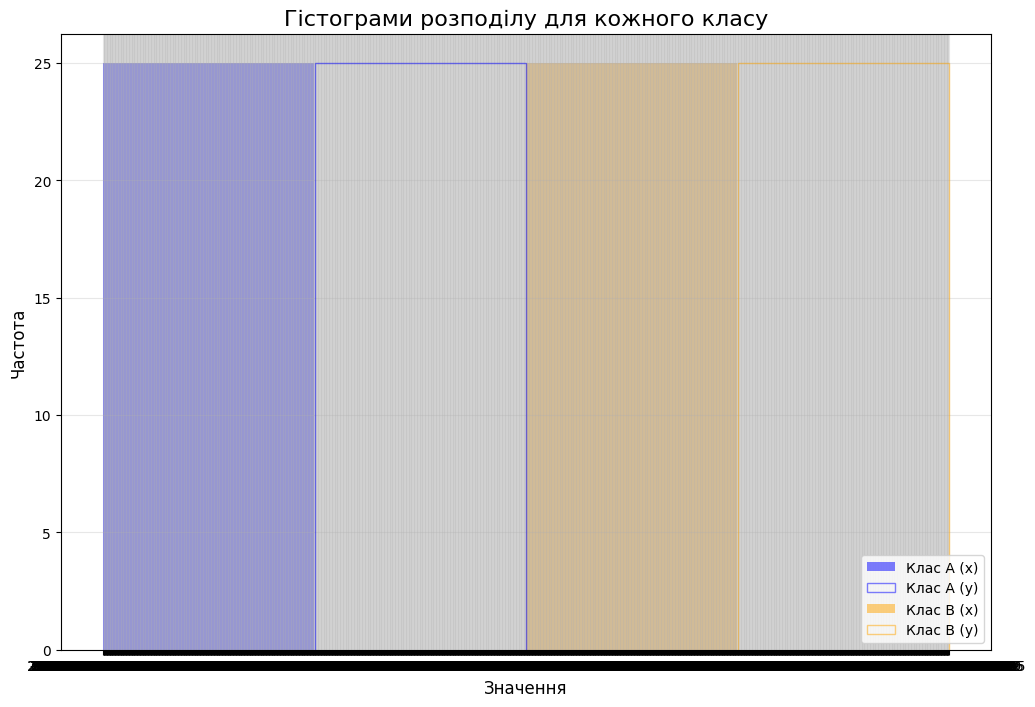

In [4]:
classes = df['class'].unique()
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(12, 8))

for i, cls in enumerate(classes):
    class_data = df[df['class'] == cls]
    plt.hist(class_data['x'], bins=20, alpha=0.5, label=f'Клас {cls} (x)', color=colors[i])
    plt.hist(class_data['y'], bins=20, alpha=0.5, label=f'Клас {cls} (y)', color=colors[i], histtype='step')

plt.title('Гістограми розподілу для кожного класу', fontsize=16)
plt.xlabel('Значення', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances

np.random.seed(42)

n_samples_per_class = 300
total_samples = n_samples_per_class * 3

centers = [
    (0, 0),
    (3, 2),
    (1, 4)
]


cov_matrices = [
    [[1.2, 0.5], [0.5, 1.0]], 
    [[1.0, -0.3], [-0.3, 1.2]],
    [[1.5, 0.2], [0.2, 0.8]]
]

X = []
y = []

for i in range(3):
    X_class = np.random.multivariate_normal(centers[i], cov_matrices[i], n_samples_per_class)
    X.append(X_class)
    y.append(np.full(n_samples_per_class, i + 1))


In [6]:
X = np.vstack(X)
y = np.concatenate(y)

df = pd.DataFrame({
    'x': X[:, 0],
    'y': X[:, 1],
    'class': y
})

df.to_csv('overlapping_classes_dataset.csv', index=False)
print("Дані збережено в файл 'overlapping_classes_dataset.csv'")

Дані збережено в файл 'overlapping_classes_dataset.csv'


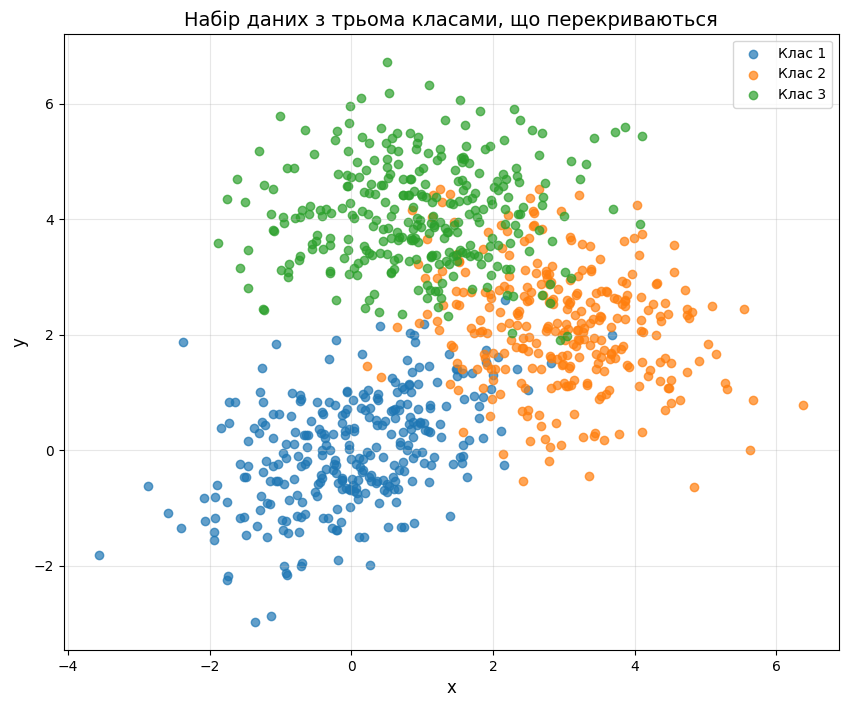

In [7]:
plt.figure(figsize=(10, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
labels = ['Клас 1', 'Клас 2', 'Клас 3']

for i in range(1, 4):
    class_data = df[df['class'] == i]
    plt.scatter(class_data['x'], class_data['y'], 
                alpha=0.7, color=colors[i-1], label=labels[i-1])

plt.title('Набір даних з трьома класами, що перекриваються', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.savefig('overlapping_classes.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:

def estimate_overlap_areas():
    def belongs_to_distribution(point, center, cov_matrix, threshold=4.0):
        diff = point - center
        inv_cov = np.linalg.inv(cov_matrix)
        mahal_dist = np.sqrt(diff.dot(inv_cov).dot(diff))
        return mahal_dist < threshold

    overlaps = {
        'class_1_2': 0,  # Точки класу 1, які також належать до класу 2
        'class_1_3': 0,  # Точки класу 1, які також належать до класу 3
        'class_2_1': 0,  # Точки класу 2, які також належать до класу 1
        'class_2_3': 0,  # Точки класу 2, які також належать до класу 3
        'class_3_1': 0,  # Точки класу 3, які також належать до класу 1
        'class_3_2': 0,  # Точки класу 3, які також належать до класу 2
        'all_three': 0   # Точки, що належать до всіх трьох класів
    }

    for index, row in df.iterrows():
        point = np.array([row['x'], row['y']])
        actual_class = int(row['class'])
        
        belongs_to = []
        for i in range(3):
            if belongs_to_distribution(point, centers[i], cov_matrices[i]):
                belongs_to.append(i+1)
        
        if len(belongs_to) > 1:
            if 1 in belongs_to and 2 in belongs_to:
                if actual_class == 1:
                    overlaps['class_1_2'] += 1
                elif actual_class == 2:
                    overlaps['class_2_1'] += 1
                
            if 1 in belongs_to and 3 in belongs_to:
                if actual_class == 1:
                    overlaps['class_1_3'] += 1
                elif actual_class == 3:
                    overlaps['class_3_1'] += 1
                
            if 2 in belongs_to and 3 in belongs_to:
                if actual_class == 2:
                    overlaps['class_2_3'] += 1
                elif actual_class == 3:
                    overlaps['class_3_2'] += 1
            
            if len(belongs_to) == 3:
                overlaps['all_three'] += 1
    
    total_overlap_points = sum(overlaps.values()) - 2 * overlaps['all_three']
    
    print(f"Точки класу 1 у зоні перекриття з класом 2: {overlaps['class_1_2']} ({overlaps['class_1_2']/n_samples_per_class:.2%})")
    print(f"Точки класу 1 у зоні перекриття з класом 3: {overlaps['class_1_3']} ({overlaps['class_1_3']/n_samples_per_class:.2%})")
    print(f"Точки класу 2 у зоні перекриття з класом 1: {overlaps['class_2_1']} ({overlaps['class_2_1']/n_samples_per_class:.2%})")
    print(f"Точки класу 2 у зоні перекриття з класом 3: {overlaps['class_2_3']} ({overlaps['class_2_3']/n_samples_per_class:.2%})")
    print(f"Точки класу 3 у зоні перекриття з класом 1: {overlaps['class_3_1']} ({overlaps['class_3_1']/n_samples_per_class:.2%})")
    print(f"Точки класу 3 у зоні перекриття з класом 2: {overlaps['class_3_2']} ({overlaps['class_3_2']/n_samples_per_class:.2%})")
    print(f"Точки, що належать до всіх трьох класів: {overlaps['all_three']} ({overlaps['all_three']/total_samples:.2%})")
    print(f"Всього точок у зонах перекриття: {total_overlap_points} ({total_overlap_points/total_samples:.2%})")
    
    return overlaps

print("\nАналіз перекриття класів:")
overlaps = estimate_overlap_areas()


Аналіз перекриття класів:
Точки класу 1 у зоні перекриття з класом 2: 132 (44.00%)
Точки класу 1 у зоні перекриття з класом 3: 97 (32.33%)
Точки класу 2 у зоні перекриття з класом 1: 247 (82.33%)
Точки класу 2 у зоні перекриття з класом 3: 243 (81.00%)
Точки класу 3 у зоні перекриття з класом 1: 114 (38.00%)
Точки класу 3 у зоні перекриття з класом 2: 271 (90.33%)
Точки, що належать до всіх трьох класів: 403 (44.78%)
Всього точок у зонах перекриття: 701 (77.89%)


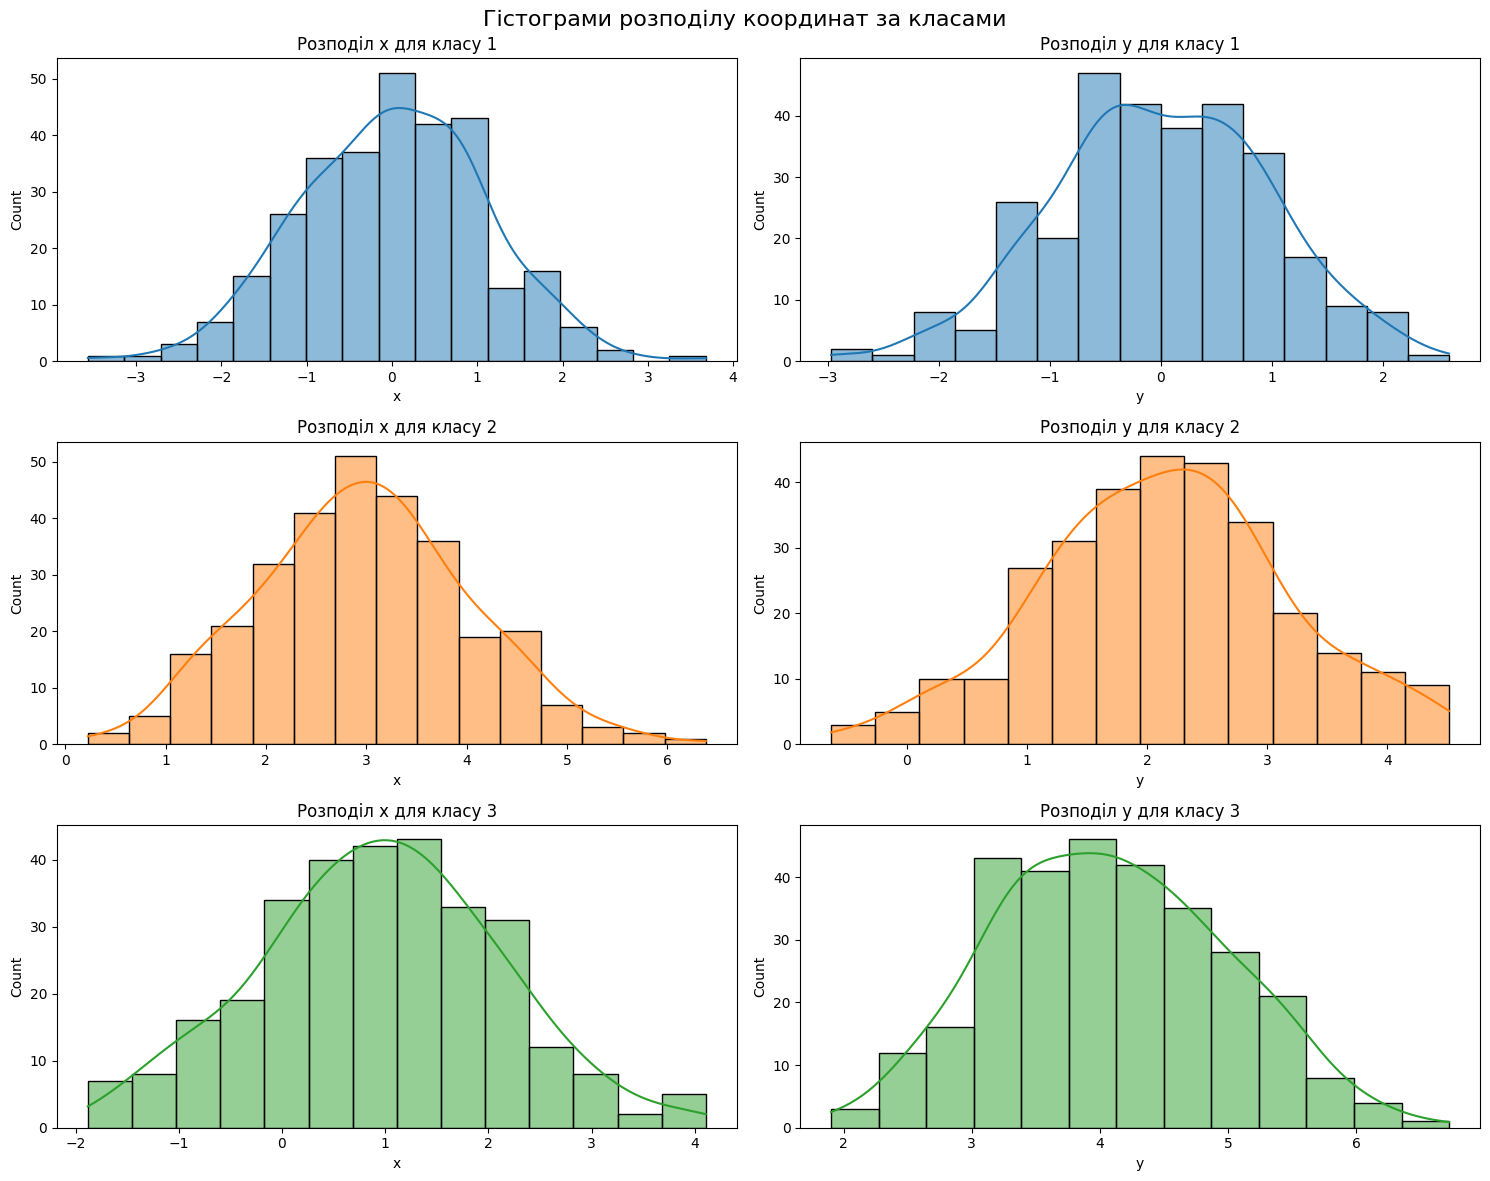

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Гістограми розподілу координат за класами', fontsize=16)

for i, cls in enumerate([1, 2, 3]):
    class_data = df[df['class'] == cls]
    
    # Гістограма для x
    sns.histplot(class_data['x'], kde=True, color=colors[i], ax=axes[i, 0])
    axes[i, 0].set_title(f'Розподіл x для класу {cls}', fontsize=12)
    axes[i, 0].set_xlabel('x', fontsize=10)
    
    # Гістограма для y
    sns.histplot(class_data['y'], kde=True, color=colors[i], ax=axes[i, 1])
    axes[i, 1].set_title(f'Розподіл y для класу {cls}', fontsize=12)
    axes[i, 1].set_xlabel('y', fontsize=10)

plt.tight_layout()
plt.savefig('histograms.png', dpi=300, bbox_inches='tight')
plt.show()

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import seaborn as sns
from scipy.stats import gaussian_kde

np.random.seed(42) 

n_points = 500

R1 = 3  
w1 = 0.6 

R2 = 5  
w2 = 1.0  

theta1 = np.random.uniform(0, 2*np.pi, n_points)  
r1 = R1 + np.random.normal(0, w1/3, n_points) 
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

theta2 = np.random.uniform(0, 2*np.pi, n_points) 
r2 = R2 + np.random.normal(0, w2/3, n_points)
x2 = r2 * np.cos(theta2)
y2 = r2 * np.sin(theta2)

In [11]:
df = pd.DataFrame({
    'x': np.concatenate([x1, x2]),
    'y': np.concatenate([y1, y2]),
    'class': np.concatenate([np.ones(n_points), 2*np.ones(n_points)])
})

df.to_csv('torus_dataset.csv', index=False)
print("Набір даних збережено в файл 'torus_dataset.csv'")
print(f"Розмір набору даних: {len(df)} точок")

Набір даних збережено в файл 'torus_dataset.csv'
Розмір набору даних: 1000 точок


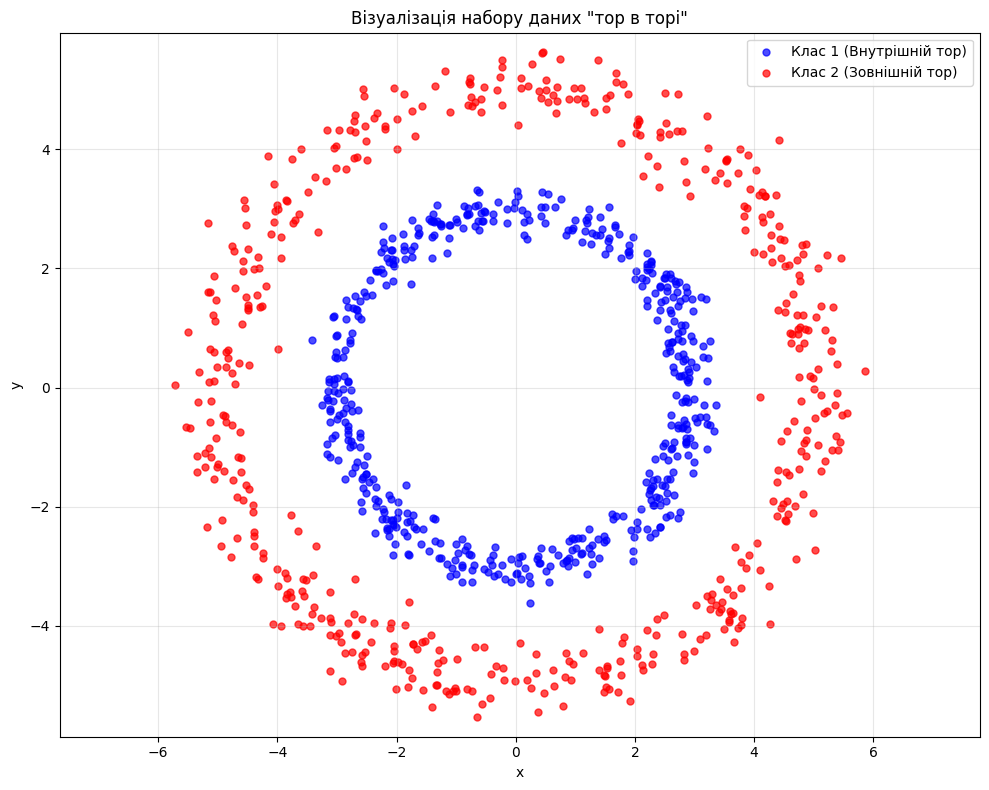

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(df[df['class'] == 1]['x'], df[df['class'] == 1]['y'], 
            c='blue', s=25, alpha=0.7, label='Клас 1 (Внутрішній тор)')
plt.scatter(df[df['class'] == 2]['x'], df[df['class'] == 2]['y'], 
            c='red', s=25, alpha=0.7, label='Клас 2 (Зовнішній тор)')
plt.title('Візуалізація набору даних "тор в торі"')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.savefig('torus_dataset_visualization.png', dpi=300)

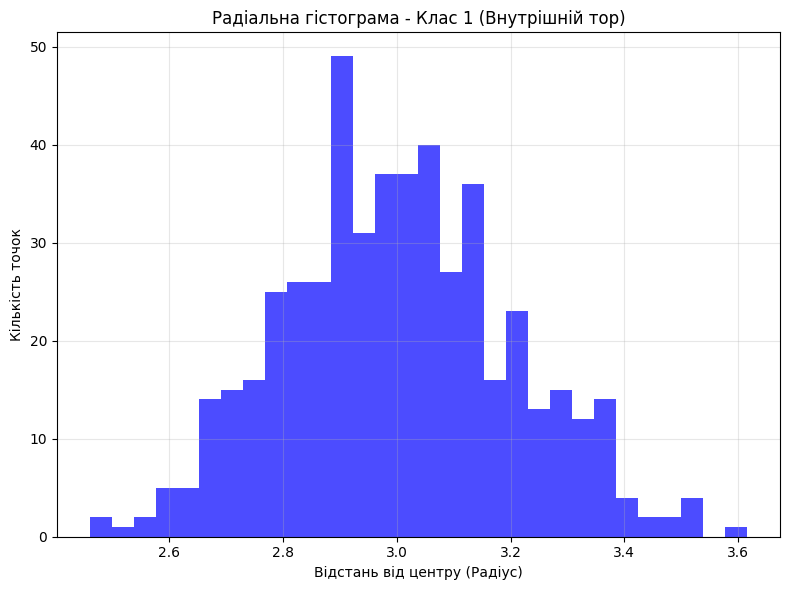

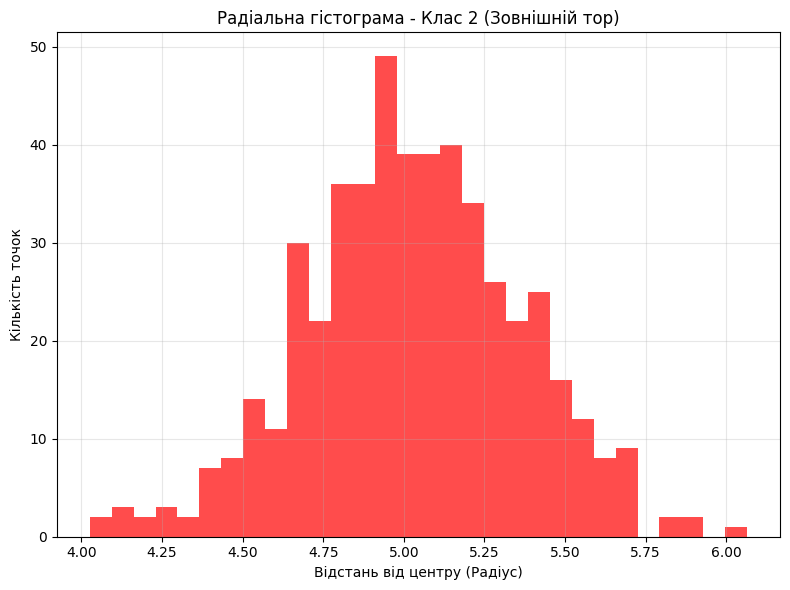

In [13]:

def plot_radial_histogram(x, y, title, color):
    r = np.sqrt(x**2 + y**2)
    
    plt.figure(figsize=(8, 6))
    plt.hist(r, bins=30, color=color, alpha=0.7)
    plt.title(f'Радіальна гістограма - {title}')
    plt.xlabel('Відстань від центру (Радіус)')
    plt.ylabel('Кількість точок')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'radial_histogram_{title}.png', dpi=300)

plot_radial_histogram(x1, y1, "Клас 1 (Внутрішній тор)", "blue")
plot_radial_histogram(x2, y2, "Клас 2 (Зовнішній тор)", "red")

/var/folders/6v/z4gfdy117m105ldgnl8t1t8c0000gn/T/ipykernel_39367/3510755869.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(X, Y, Z, cmap=plt.cm.get_cmap('Blues' if color=='blue' else 'Reds'))


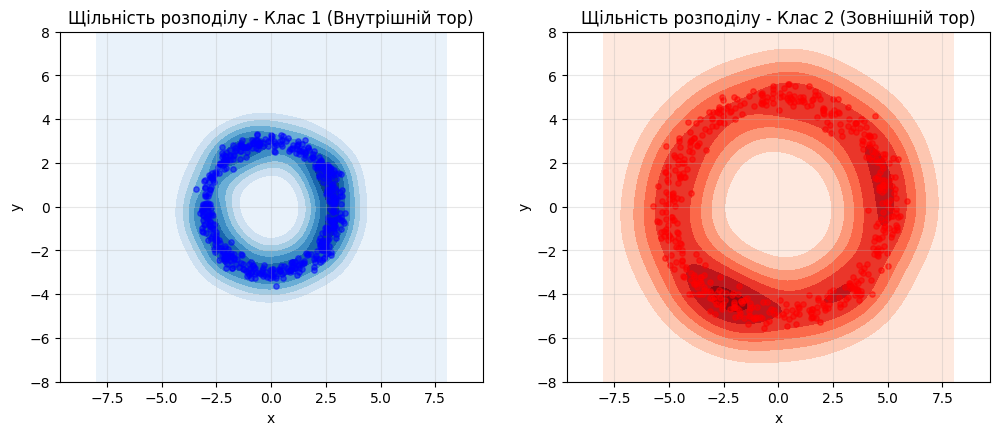

In [14]:

plt.figure(figsize=(12, 10))

x_grid = np.linspace(-8, 8, 100)
y_grid = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])

def plot_density(data_x, data_y, subplot_idx, title, color):
    plt.subplot(2, 2, subplot_idx)
    
    values = np.vstack([data_x, data_y])
    kernel = gaussian_kde(values)
    Z = np.reshape(kernel(positions), X.shape)
    
    plt.contourf(X, Y, Z, cmap=plt.cm.get_cmap('Blues' if color=='blue' else 'Reds'))
    plt.scatter(data_x, data_y, c=color, s=15, alpha=0.5)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.grid(True, alpha=0.3)

plot_density(x1, y1, 1, 'Щільність розподілу - Клас 1 (Внутрішній тор)', 'blue')
plot_density(x2, y2, 2, 'Щільність розподілу - Клас 2 (Зовнішній тор)', 'red')

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(42)

n_samples_per_class = 500  
total_samples = n_samples_per_class * 2
noise_level = 0.1  
spiral_factor = 0.4 
max_radius = 15 

t = np.linspace(0, 4 * np.pi, n_samples_per_class)

radius1 = t * spiral_factor
x1 = radius1 * np.cos(t)
y1 = radius1 * np.sin(t)

x1 = x1 + np.random.normal(0, noise_level, n_samples_per_class)
y1 = y1 + np.random.normal(0, noise_level, n_samples_per_class)
spiral1 = np.column_stack((x1, y1))
labels1 = np.ones(n_samples_per_class)

radius2 = t * spiral_factor
x2 = radius2 * np.cos(t + np.pi)
y2 = radius2 * np.sin(t + np.pi)

x2 = x2 + np.random.normal(0, noise_level, n_samples_per_class)
y2 = y2 + np.random.normal(0, noise_level, n_samples_per_class)
spiral2 = np.column_stack((x2, y2))
labels2 = np.full(n_samples_per_class, 2)


In [16]:
X = np.vstack((spiral1, spiral2))
y = np.hstack((labels1, labels2))

df = pd.DataFrame({
    'x': X[:, 0],
    'y': X[:, 1],
    'class': y.astype(int)
})

df.to_csv('double_spiral_dataset.csv', index=False)

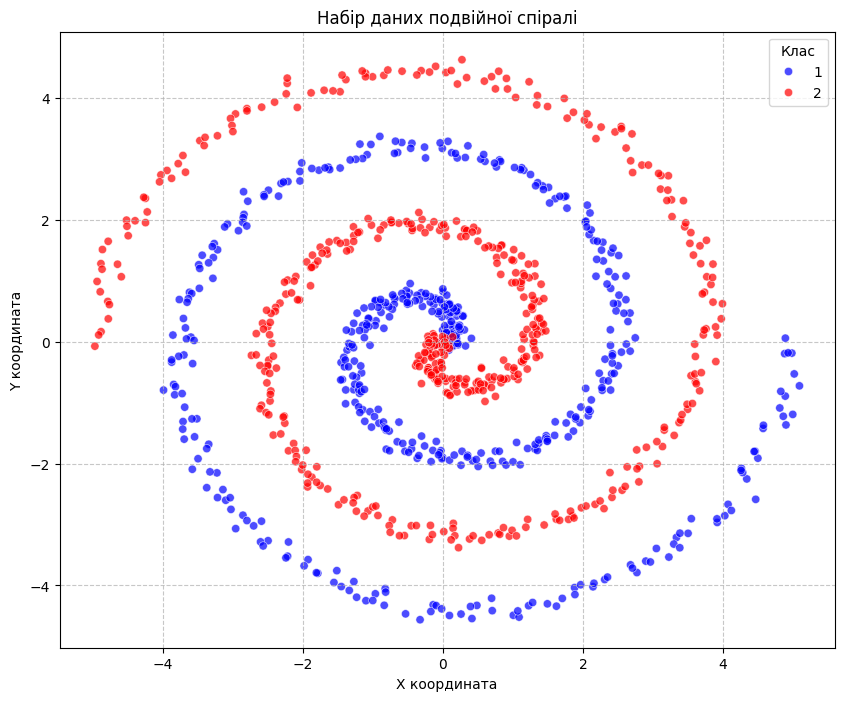

In [17]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='class', data=df, palette=['blue', 'red'], alpha=0.7)
plt.title('Набір даних подвійної спіралі')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.legend(title='Клас')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('double_spiral_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

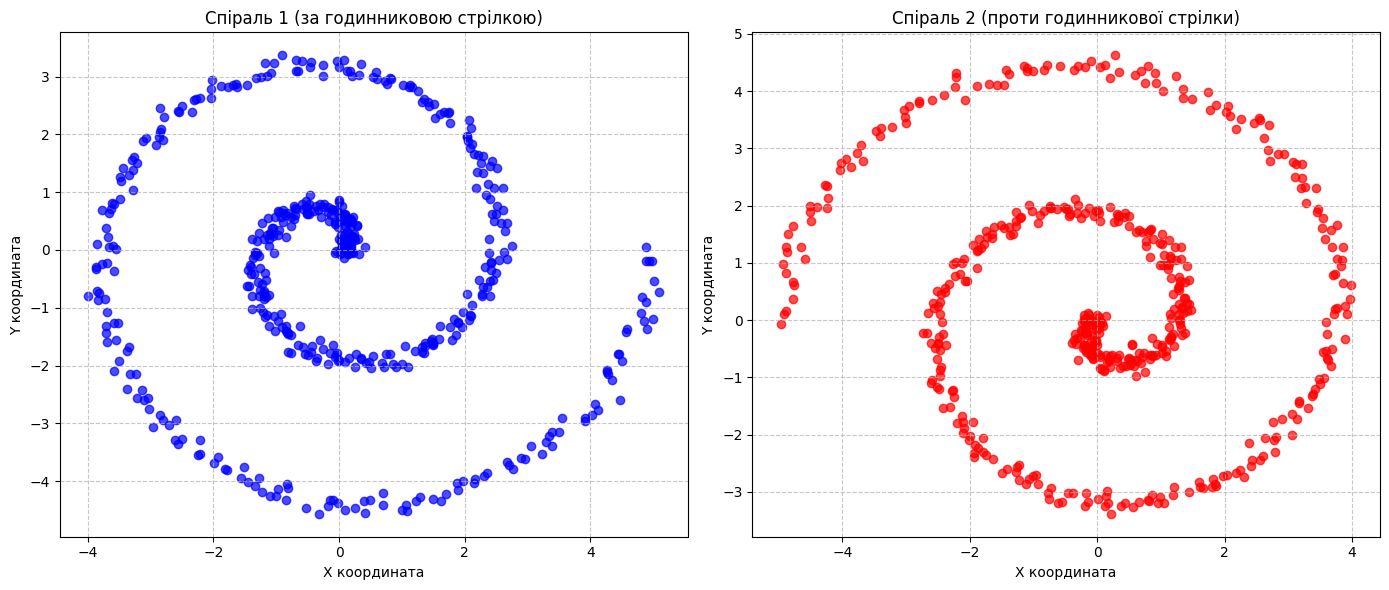

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(x1, y1, c='blue', alpha=0.7)
axes[0].set_title('Спіраль 1 (за годинниковою стрілкою)')
axes[0].set_xlabel('X координата')
axes[0].set_ylabel('Y координата')
axes[0].grid(True, linestyle='--', alpha=0.7)

axes[1].scatter(x2, y2, c='red', alpha=0.7)
axes[1].set_title('Спіраль 2 (проти годинникової стрілки)')
axes[1].set_xlabel('X координата')
axes[1].set_ylabel('Y координата')
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('individual_spirals.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:

print(f"Загальна кількість точок: {len(df)}")
print(f"Кількість точок у класі 0: {len(df[df['class'] == 1])}")
print(f"Кількість точок у класі 1: {len(df[df['class'] == 2])}")

print("\nСтатистика координат для класу 1:")
print(df[df['class'] == 1][['x', 'y']].describe())

print("\nСтатистика координат для класу 2:")
print(df[df['class'] == 2][['x', 'y']].describe())


Загальна кількість точок: 1000
Кількість точок у класі 0: 500
Кількість точок у класі 1: 500

Статистика координат для класу 1:
                x           y
count  500.000000  500.000000
mean     0.005710   -0.395996
std      2.066353    2.006864
min     -3.987314   -4.563433
25%     -1.192114   -1.756296
50%     -0.012484   -0.060814
75%      1.471138    0.703471
max      5.089099    3.368604

Статистика координат для класу 2:
                x           y
count  500.000000  500.000000
mean     0.005822    0.402498
std      2.066663    2.012909
min     -4.967296   -3.381167
25%     -1.391541   -0.689152
50%      0.040416    0.108661
75%      1.223241    1.752583
max      3.990655    4.626673


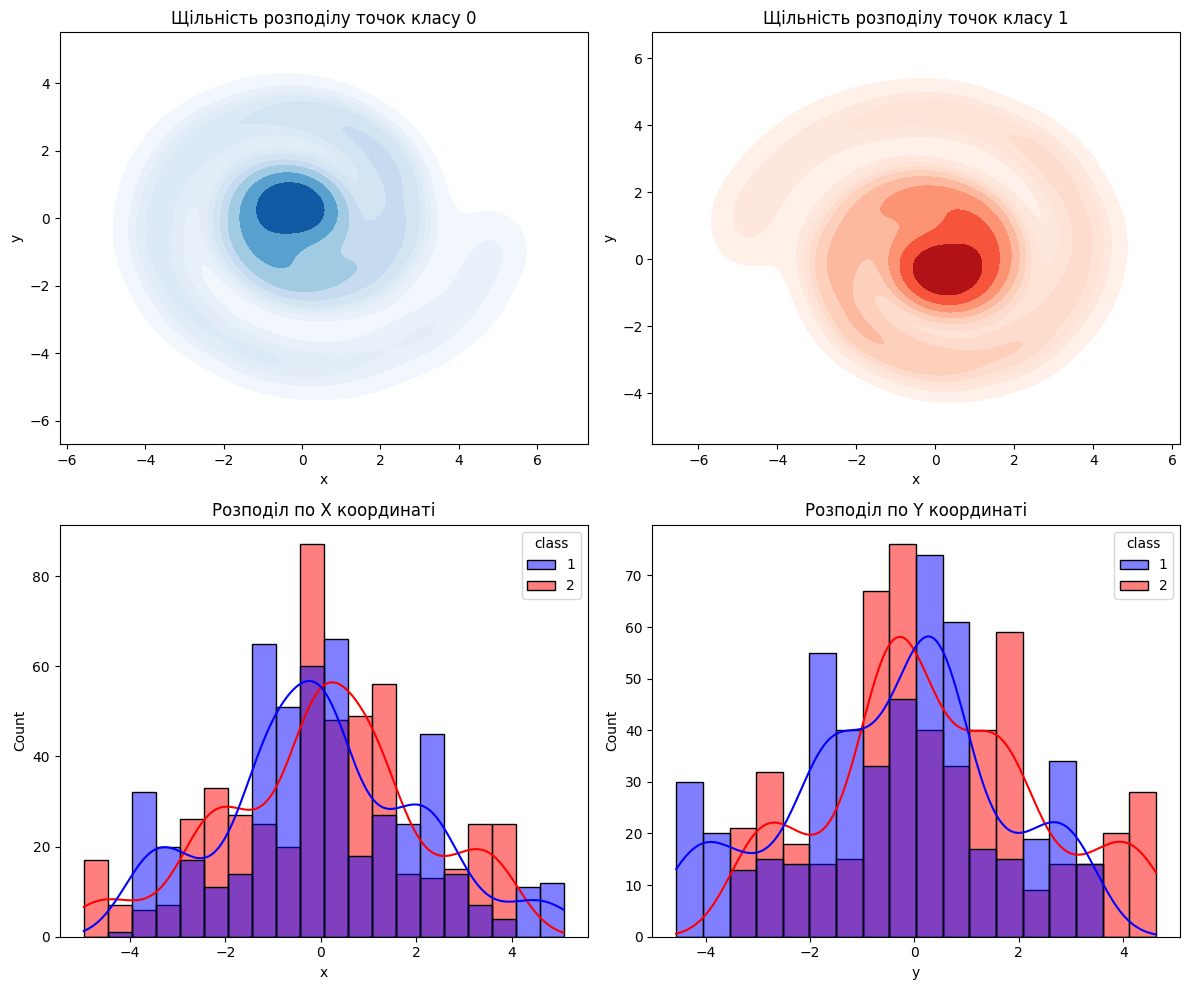

In [20]:

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.kdeplot(data=df[df['class'] == 1], x='x', y='y', fill=True, cmap='Blues')
plt.title('Щільність розподілу точок класу 0')

plt.subplot(2, 2, 2)
sns.kdeplot(data=df[df['class'] == 2], x='x', y='y', fill=True, cmap='Reds')
plt.title('Щільність розподілу точок класу 1')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='x', hue='class', kde=True, palette=['blue', 'red'])
plt.title('Розподіл по X координаті')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='y', hue='class', kde=True, palette=['blue', 'red'])
plt.title('Розподіл по Y координаті')

plt.tight_layout()
plt.savefig('distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import matplotlib as mpl

plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['figure.figsize'] = [12, 8]
mpl.rcParams['font.size'] = 12

def lorenz_system(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    return [dx_dt, dy_dt, dz_dt]

In [22]:

def solve_lorenz(sigma, rho, beta, initial_conditions=[1.0, 1.0, 1.0], t_span=[0, 100], t_eval=None):
    if t_eval is None:
        t_eval = np.linspace(t_span[0], t_span[1], 10000)
    
    solution = solve_ivp(
        lambda t, xyz: lorenz_system(t, xyz, sigma, rho, beta),
        t_span=t_span,
        y0=initial_conditions,
        t_eval=t_eval,
        method='RK45',
        rtol=1e-6,
        atol=1e-9
    )
    
    return solution.t, solution.y

In [23]:

def plot_lorenz_3d(t, xyz, title, alpha=0.8, linewidth=0.5, color_map='viridis', elev=30, azim=45):
    x, y, z = xyz
    
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    norm = plt.Normalize(t.min(), t.max())
    colors = plt.cm.get_cmap(color_map)(norm(t))
    
    for i in range(len(t)-1):
        ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=colors[i], linewidth=linewidth, alpha=alpha)
    
    ax.scatter(x[0], y[0], z[0], color='red', s=50, label='Початкова точка')
    
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('Y', fontsize=14)
    ax.set_zlabel('Z', fontsize=14)
    ax.set_title(title, fontsize=16)
    
    ax.view_init(elev=elev, azim=azim)
    
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), ax=ax, pad=0.1)
    cbar.ax.set_ylabel('Час', fontsize=12)
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [24]:
def plot_lorenz_2d_projections(t, xyz, title):
    x, y, z = xyz
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].plot(x, y, 'b-', linewidth=0.5, alpha=0.8)
    axes[0].set_xlabel('X', fontsize=12)
    axes[0].set_ylabel('Y', fontsize=12)
    axes[0].set_title('Проекція XY', fontsize=14)
    
    axes[1].plot(x, z, 'g-', linewidth=0.5, alpha=0.8)
    axes[1].set_xlabel('X', fontsize=12)
    axes[1].set_ylabel('Z', fontsize=12)
    axes[1].set_title('Проекція XZ', fontsize=14)
    
    axes[2].plot(y, z, 'r-', linewidth=0.5, alpha=0.8)
    axes[2].set_xlabel('Y', fontsize=12)
    axes[2].set_ylabel('Z', fontsize=12)
    axes[2].set_title('Проекція YZ', fontsize=14)
    
    fig.suptitle(title, fontsize=16)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

In [25]:
def compare_trajectories(results):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
    
    for i, result in enumerate(results):
        x, y, z = result['xyz']
        params = result['params']
        
        step = max(1, len(x) // 1000)
        
        ax.plot(x[::step], y[::step], z[::step], 
                color=colors[i % len(colors)], 
                linewidth=1.0, 
                alpha=0.7,
                label=f"{params['name']} (σ={params['sigma']}, ρ={params['rho']}, β={params['beta']})")
    
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('Y', fontsize=14)
    ax.set_zlabel('Z', fontsize=14)
    ax.set_title('Порівняння траєкторій системи Лоренца для різних параметрів', fontsize=16)
    
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    
    for i, result in enumerate(results):
        t = result['t']
        x, y, z = result['xyz']
        params = result['params']
        
        step = max(1, len(t) // 1000)
        
        axes[0].plot(t[::step], x[::step], 
                    color=colors[i % len(colors)], 
                    linewidth=1.0, 
                    alpha=0.8,
                    label=f"{params['name']}")
        
        axes[1].plot(t[::step], y[::step], 
                    color=colors[i % len(colors)], 
                    linewidth=1.0, 
                    alpha=0.8)
        
        axes[2].plot(t[::step], z[::step], 
                    color=colors[i % len(colors)], 
                    linewidth=1.0, 
                    alpha=0.8)
    
    axes[0].set_ylabel('X', fontsize=12)
    axes[1].set_ylabel('Y', fontsize=12)
    axes[2].set_ylabel('Z', fontsize=12)
    axes[2].set_xlabel('Час', fontsize=12)
    
    axes[0].set_title('Порівняння змінних системи Лоренца в часі', fontsize=16)
    axes[0].legend()
    
    plt.tight_layout()
    plt.show()

In [26]:
def compare_parameter_sets(parameter_sets, initial_conditions=[1.0, 1.0, 1.0], t_end=50):
    results = []
    
    for params in parameter_sets:
        print(f"Генерація даних для набору: {params['name']}")
        t, xyz = solve_lorenz(
            sigma=params['sigma'],
            rho=params['rho'],
            beta=params['beta'],
            initial_conditions=initial_conditions,
            t_span=[0, t_end]
        )
        
        results.append({
            'name': params['name'],
            'params': params,
            't': t,
            'xyz': xyz
        })
        
        title = f"Система Лоренца: {params['name']}\n" \
                f"σ={params['sigma']}, ρ={params['rho']}, β={params['beta']}"
        plot_lorenz_3d(t, xyz, title)
        
        plot_lorenz_2d_projections(t, xyz, title)
    
    compare_trajectories(results)
    
    return results

In [27]:
def analyze_initial_conditions_sensitivity(sigma=10, rho=28, beta=8/3, delta=0.001, t_end=40):
    ic1 = [1.0, 1.0, 1.0]
    ic2 = [1.0 + delta, 1.0, 1.0]  # Малий відхил
    
    t, xyz1 = solve_lorenz(sigma, rho, beta, initial_conditions=ic1, t_span=[0, t_end])
    _, xyz2 = solve_lorenz(sigma, rho, beta, initial_conditions=ic2, t_span=[0, t_end])
    
    distance = np.sqrt(
        (xyz1[0] - xyz2[0])**2 + 
        (xyz1[1] - xyz2[1])**2 + 
        (xyz1[2] - xyz2[2])**2
    )
    
    plt.figure(figsize=(12, 6))
    plt.semilogy(t, distance, 'b-', linewidth=1.5)
    plt.grid(True)
    plt.xlabel('Час', fontsize=14)
    plt.ylabel('Відстань між траєкторіями (log)', fontsize=14)
    plt.title(f'Чутливість до початкових умов (δ={delta}), σ={sigma}, ρ={rho}, β={beta}', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    step = max(1, len(t) // 1000)
    
    ax.plot(xyz1[0][::step], xyz1[1][::step], xyz1[2][::step], 
            'b-', linewidth=0.7, alpha=0.8, label=f'Початкові умови: {ic1}')
    
    ax.plot(xyz2[0][::step], xyz2[1][::step], xyz2[2][::step], 
            'r-', linewidth=0.7, alpha=0.8, label=f'Початкові умови: {ic2}')
    
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('Y', fontsize=14)
    ax.set_zlabel('Z', fontsize=14)
    ax.set_title(f'Порівняння траєкторій з незначними відмінностями в початкових умовах\nδ={delta}', fontsize=16)
    
    ax.legend()
    plt.tight_layout()
    plt.show()

Генерація даних для набору: Класичний хаос


/var/folders/6v/z4gfdy117m105ldgnl8t1t8c0000gn/T/ipykernel_39367/3394786918.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_map)(norm(t))


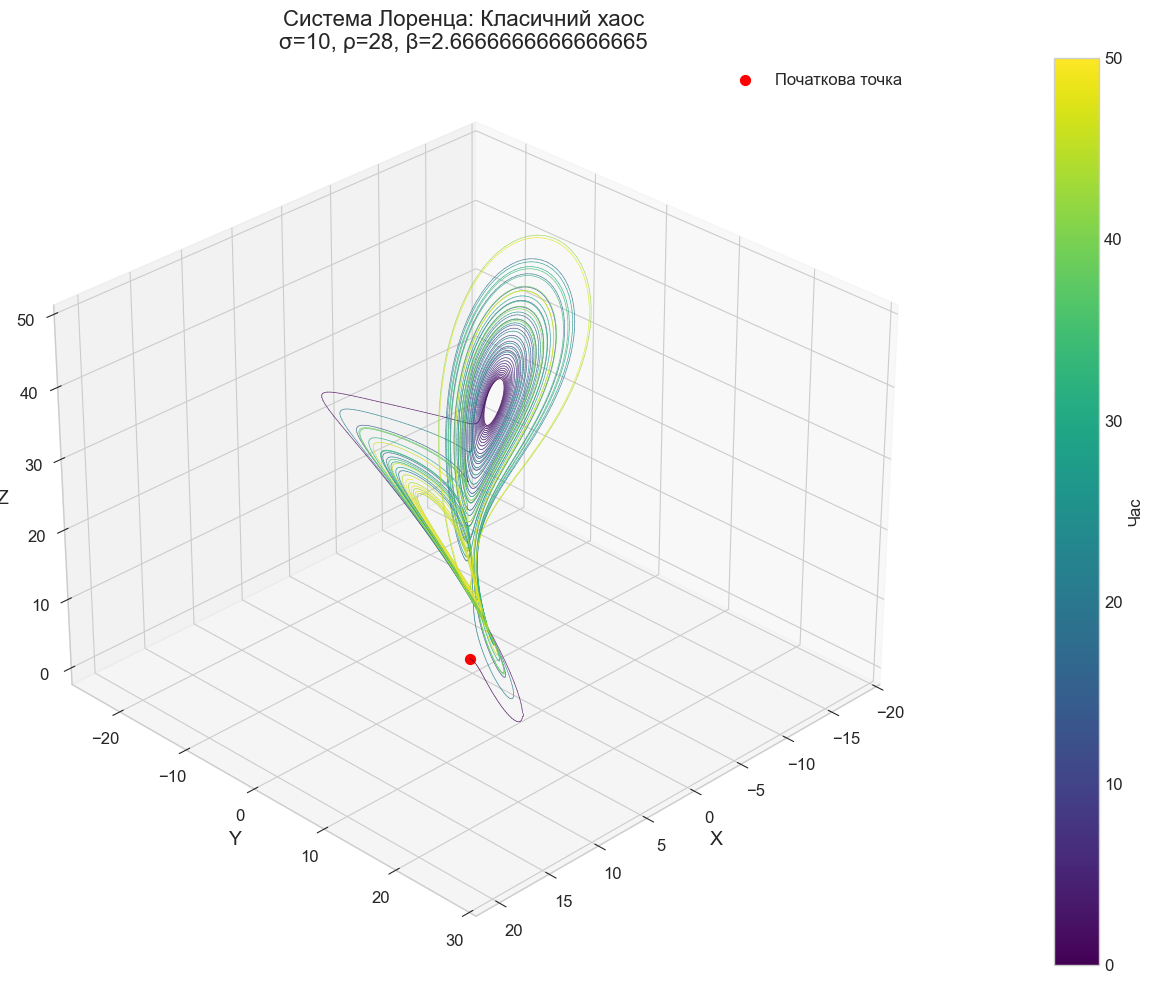

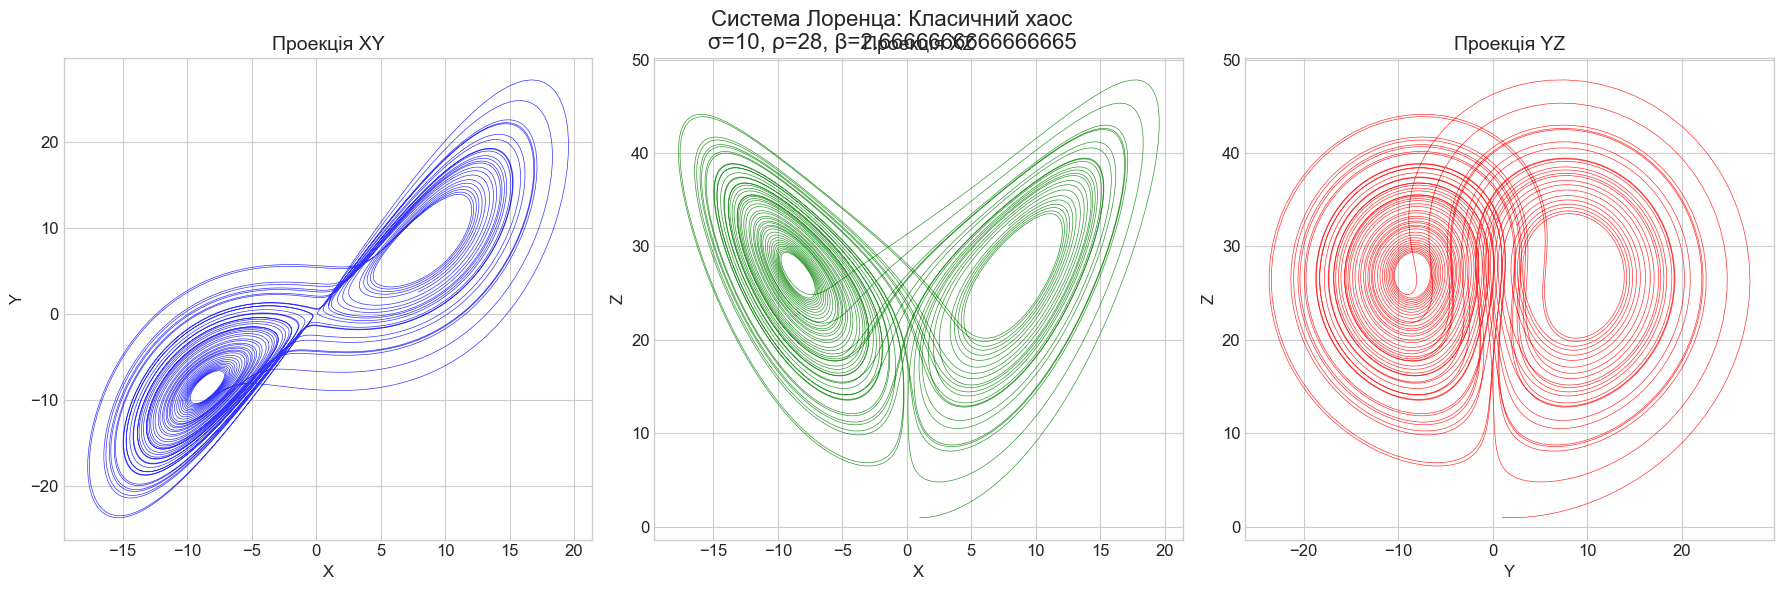

Генерація даних для набору: Стабільний режим


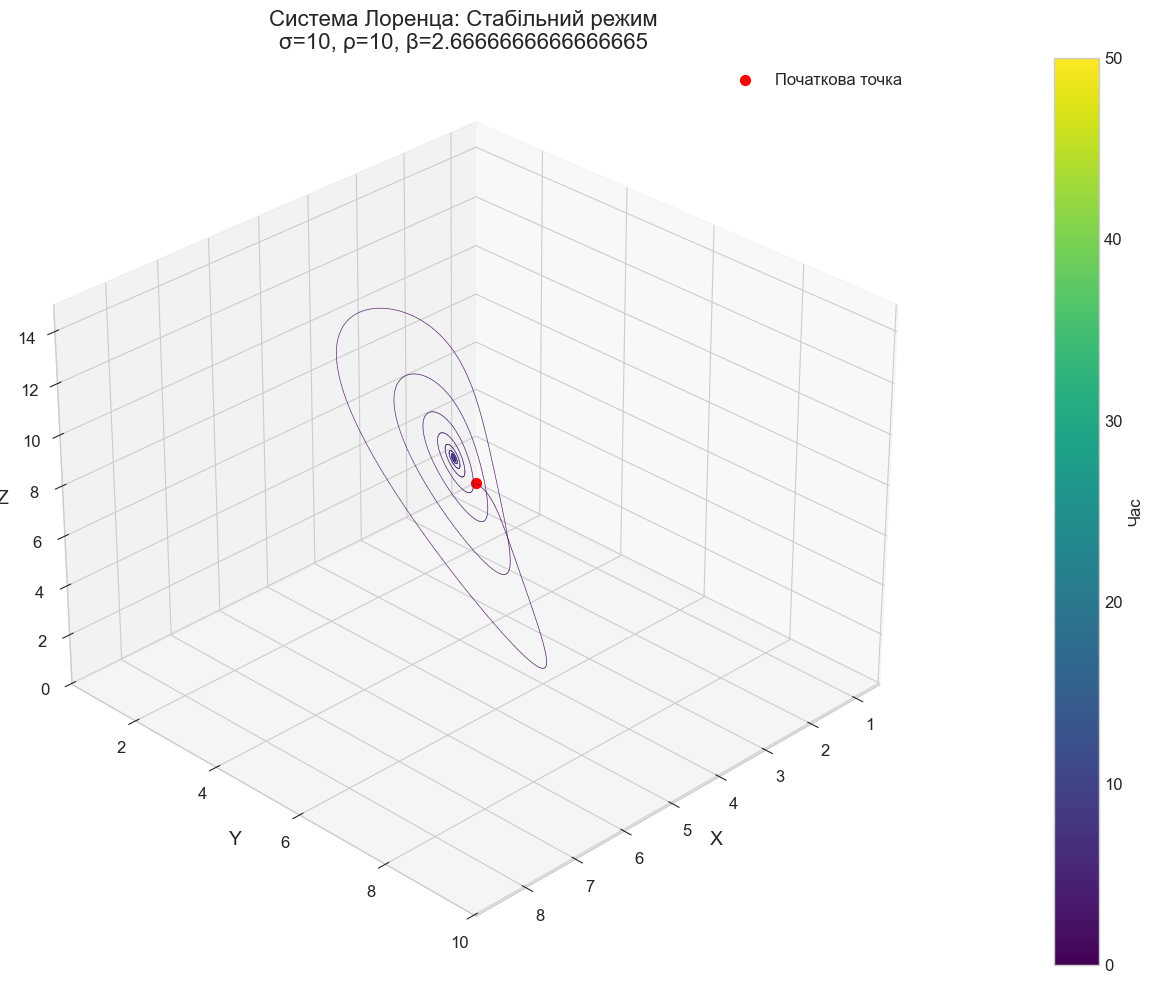

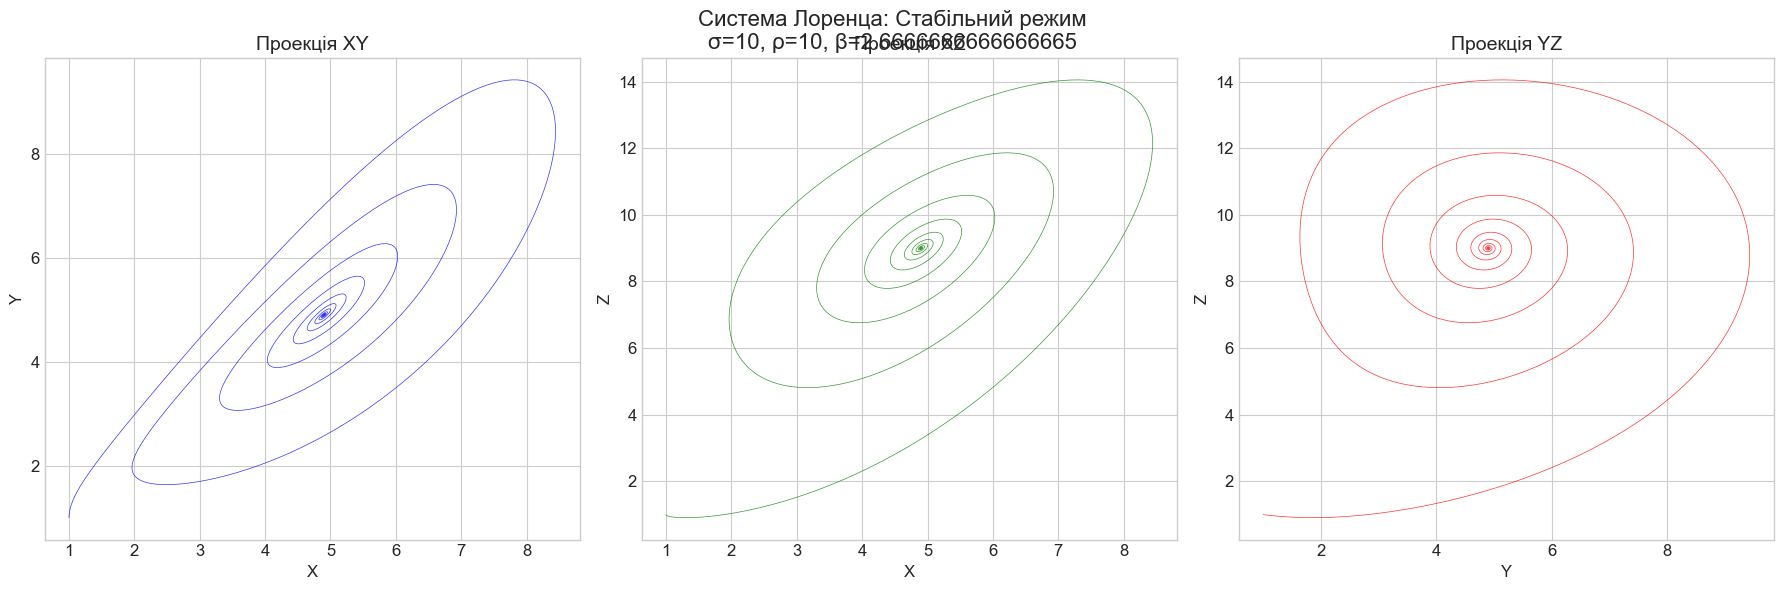

Генерація даних для набору: Сильний хаос


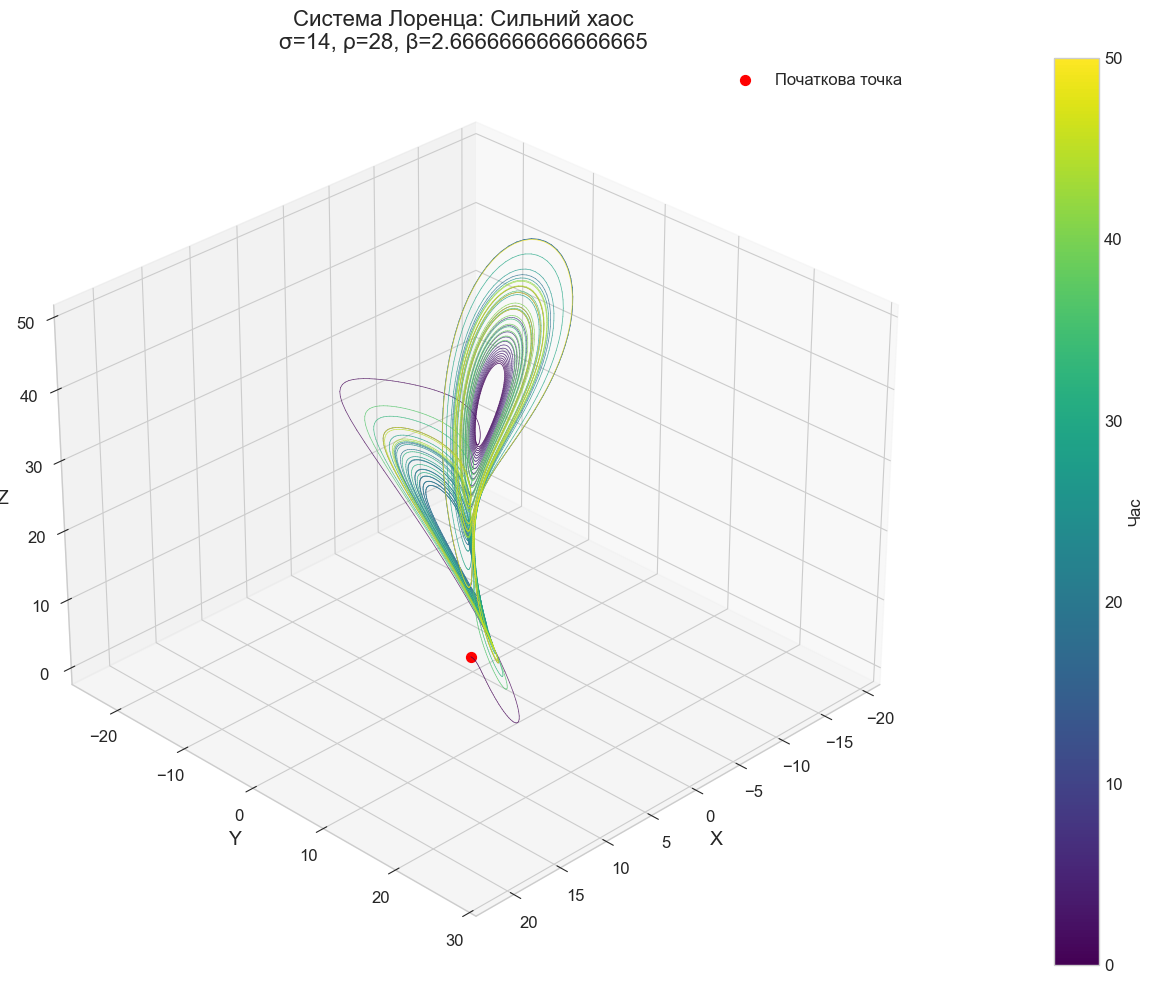

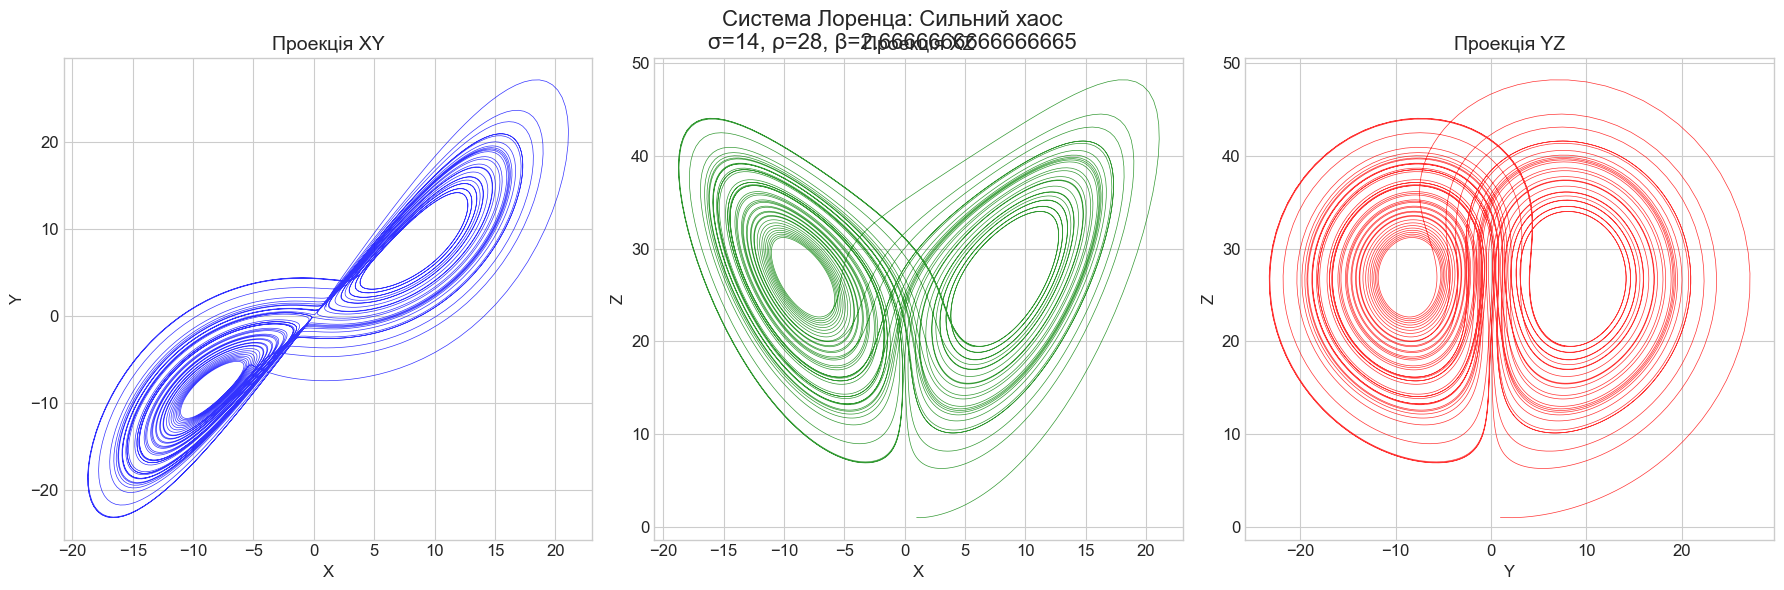

Генерація даних для набору: Модифікований режим


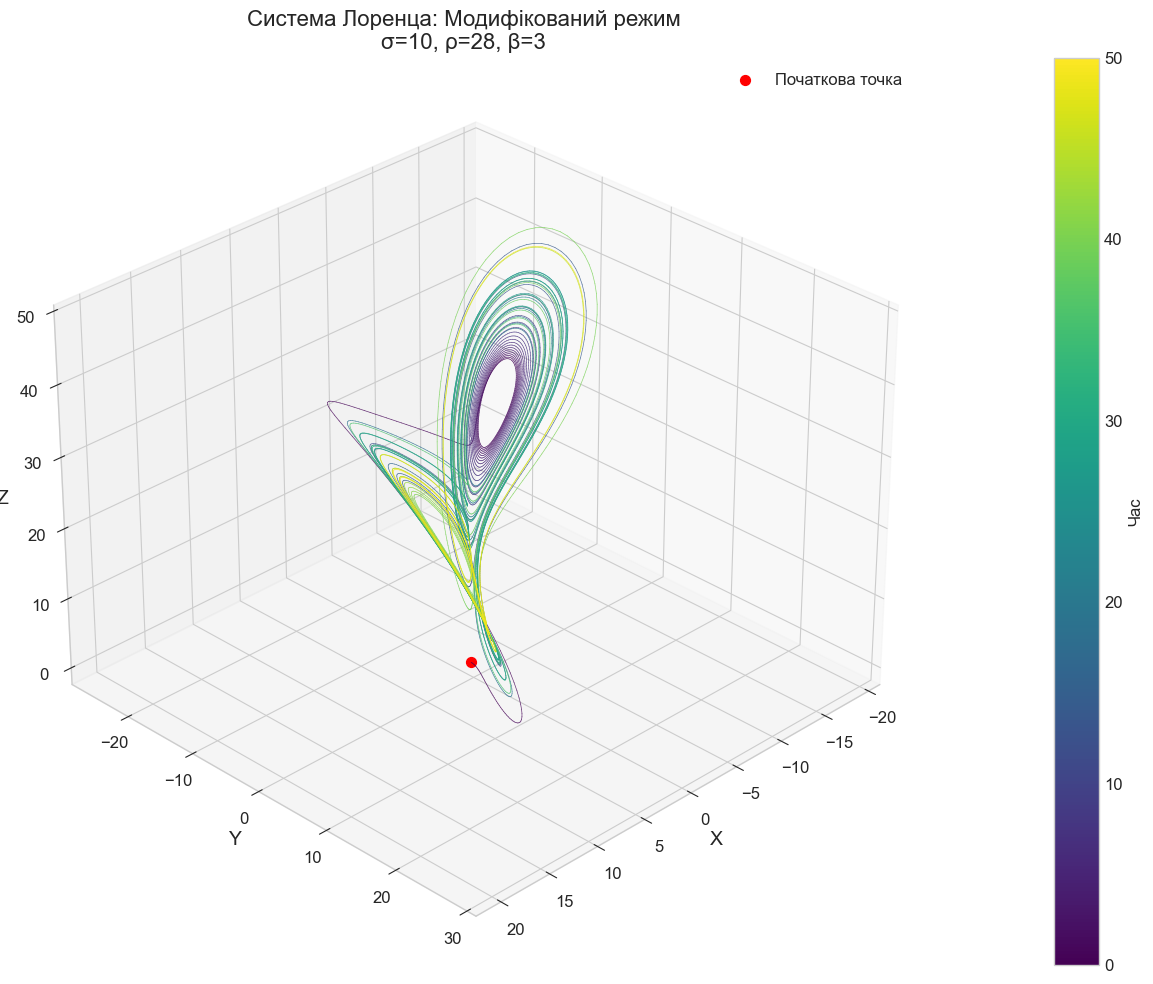

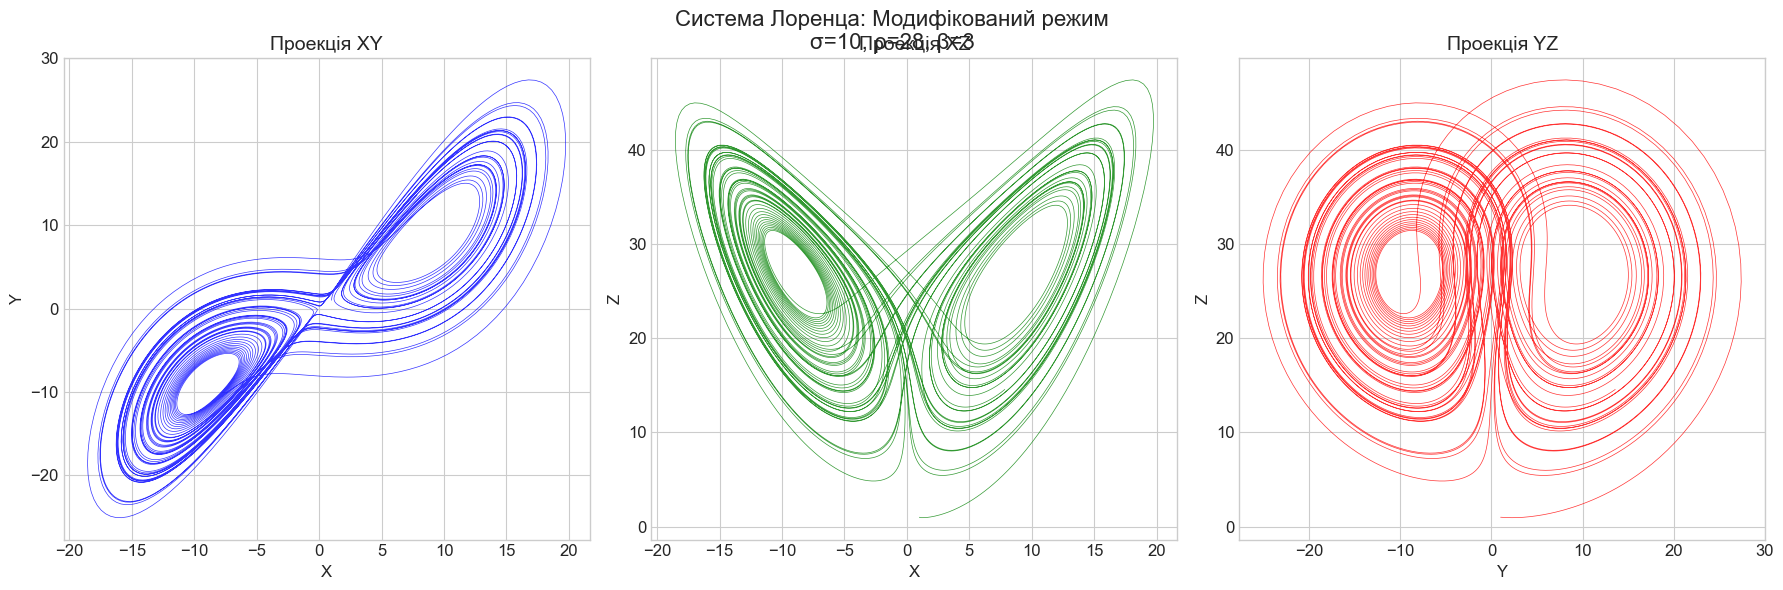

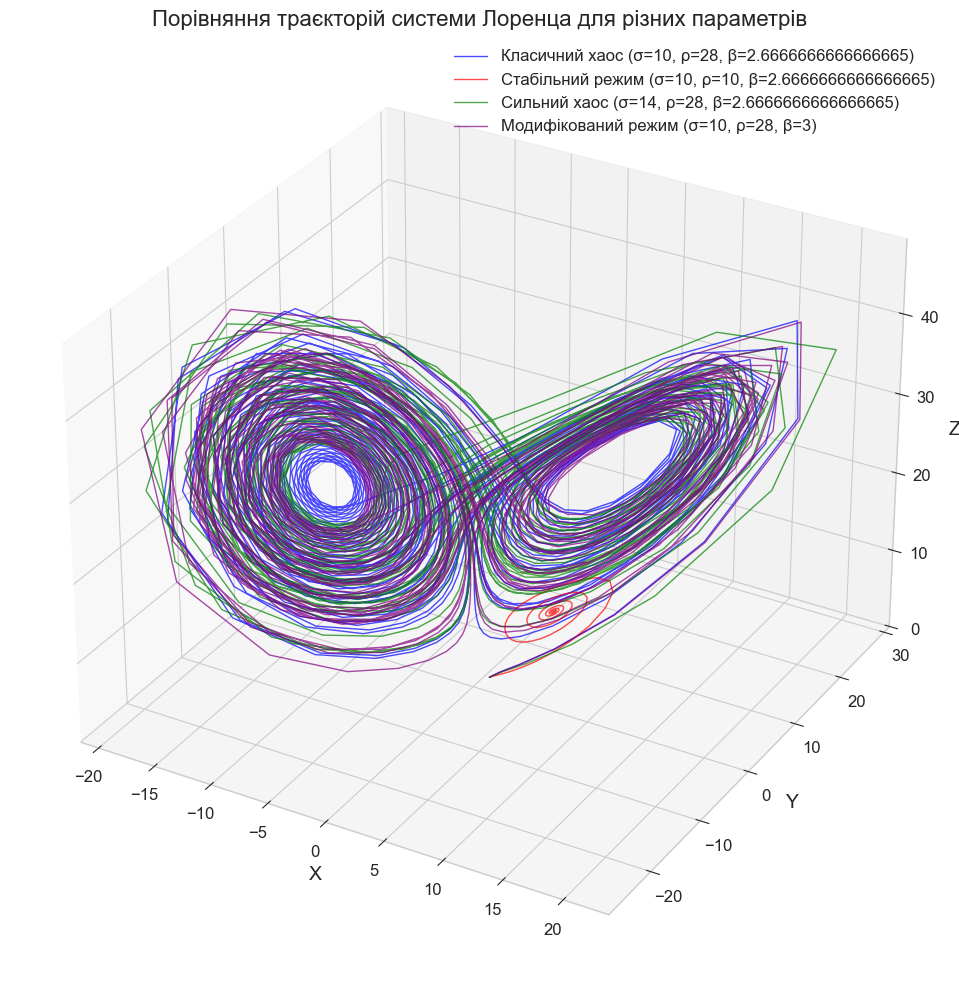

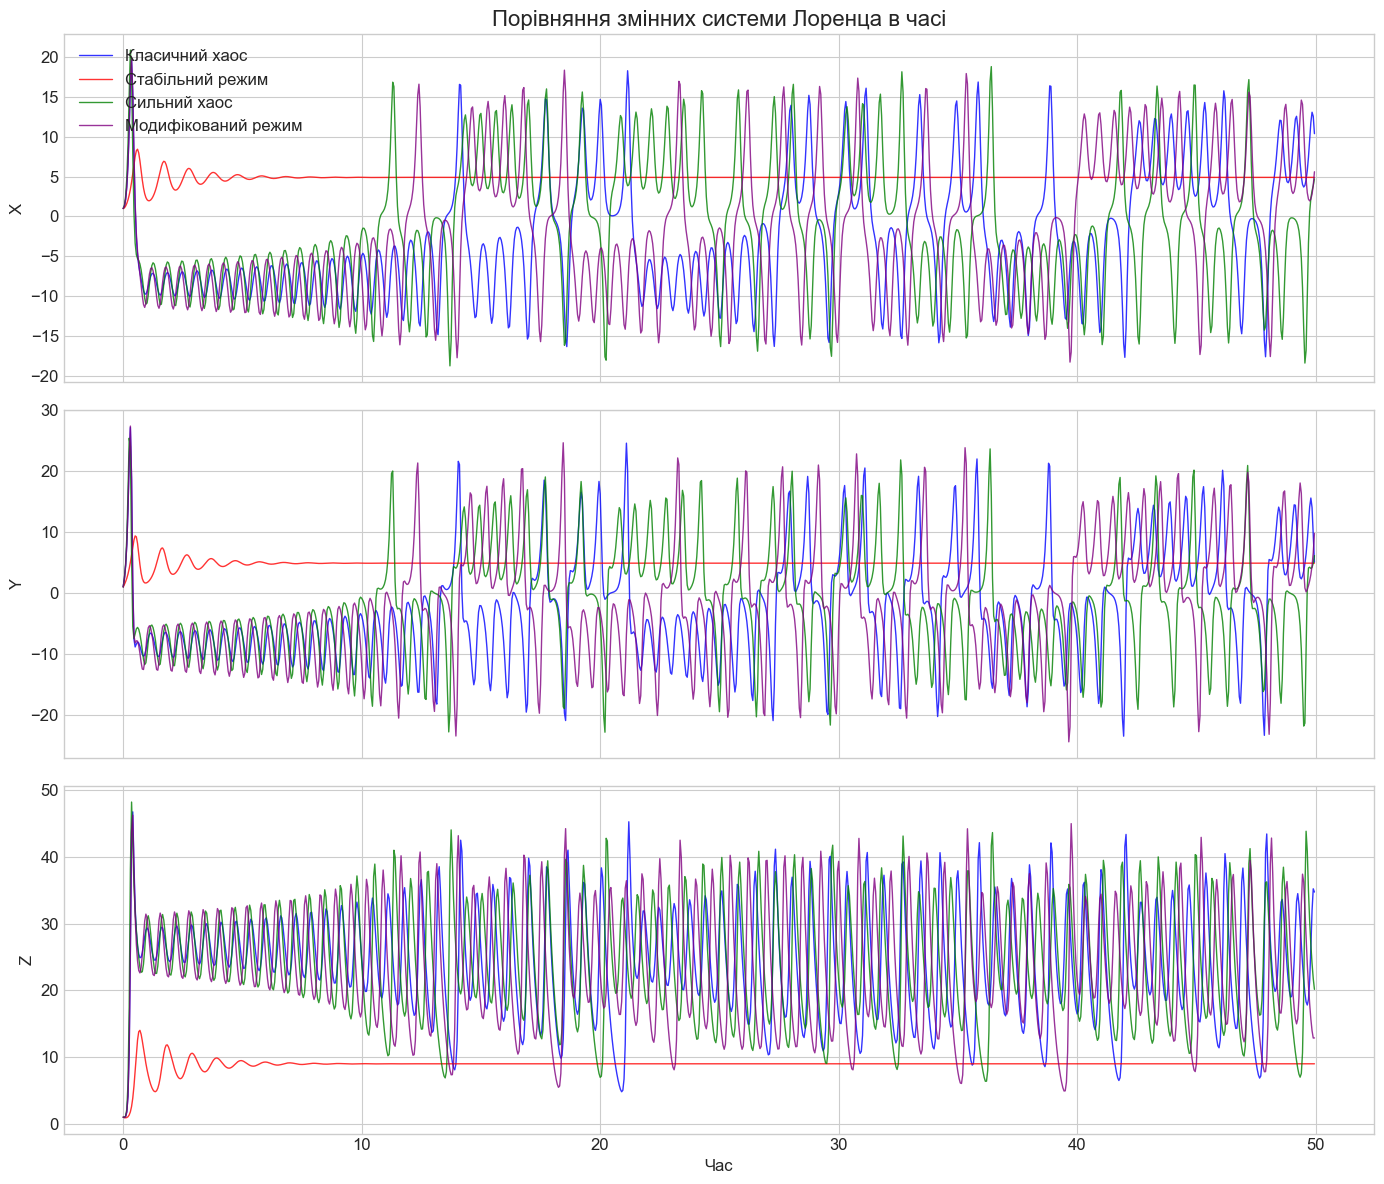


Аналіз чутливості до початкових умов...


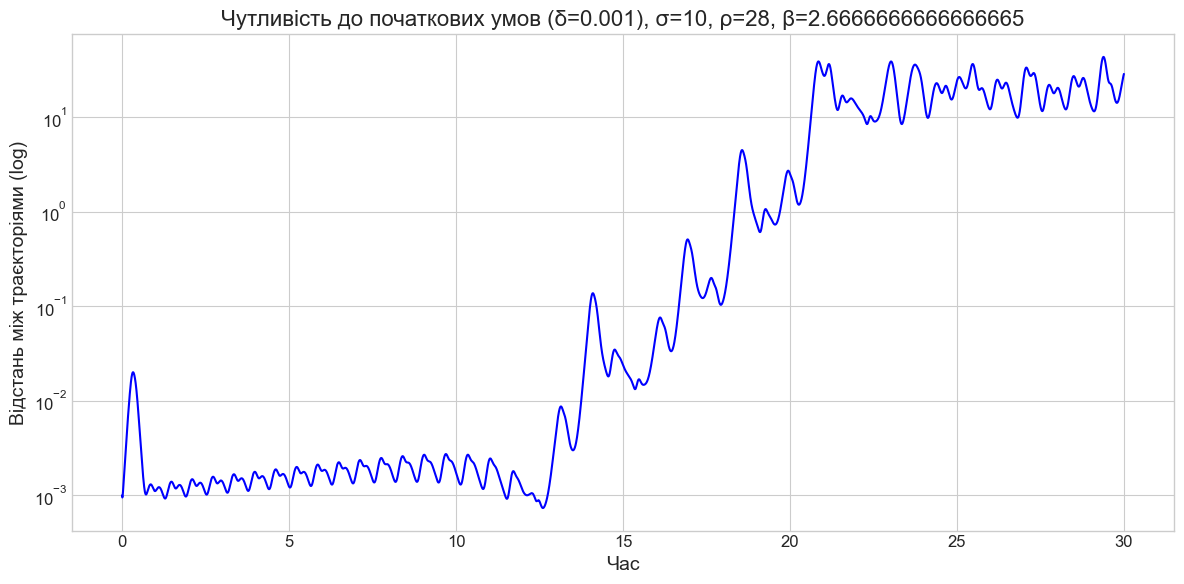

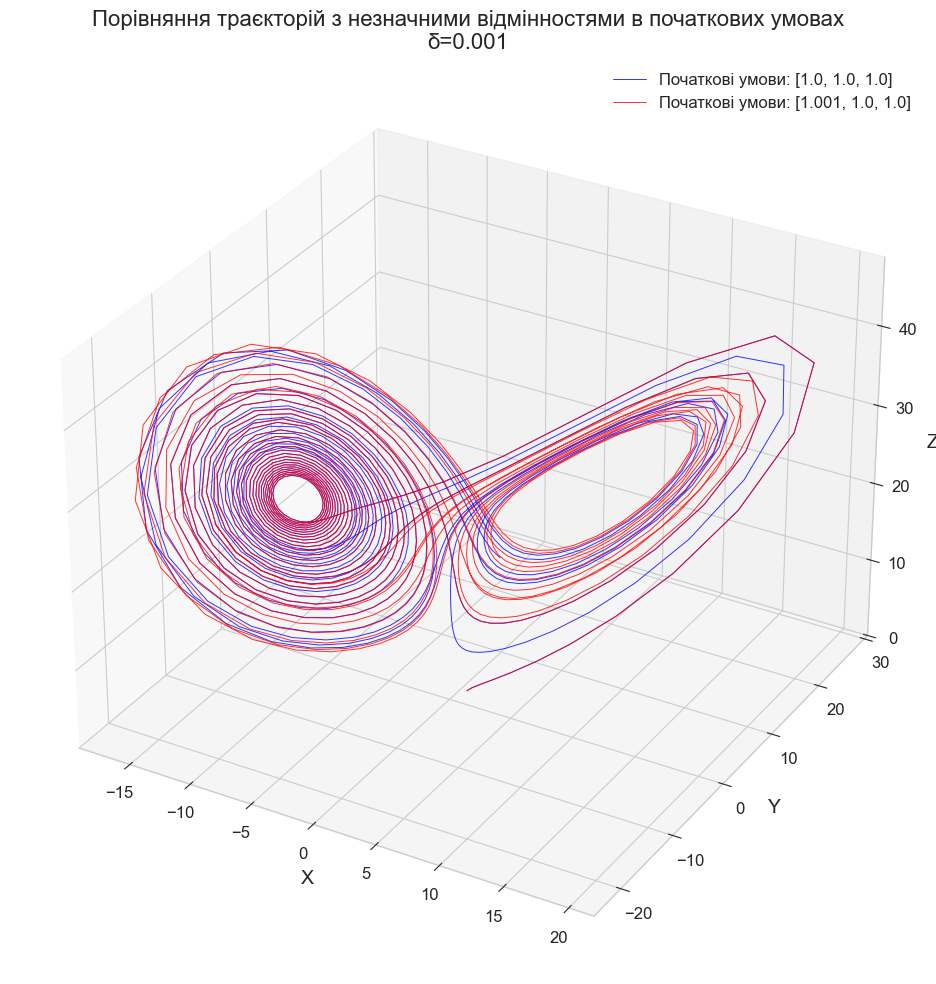


Аналіз завершено


In [28]:
def analyze():
    parameter_sets = [
        {
            'name': 'Класичний хаос',
            'sigma': 10,
            'rho': 28,
            'beta': 8/3
        },
        {
            'name': 'Стабільний режим',
            'sigma': 10,
            'rho': 10,
            'beta': 8/3
        },
        {
            'name': 'Сильний хаос',
            'sigma': 14,
            'rho': 28,
            'beta': 8/3
        },
        {
            'name': 'Модифікований режим',
            'sigma': 10,
            'rho': 28,
            'beta': 3
        }
    ]
    
    results = compare_parameter_sets(parameter_sets, t_end=50)
    
    print("\nАналіз чутливості до початкових умов...")
    analyze_initial_conditions_sensitivity(delta=0.001, t_end=30)
    
    print("\nАналіз завершено")

analyze()